# Пример 1

In [1]:
# Работа с матрицами
import numpy as np
# Линейное программирование
from scipy.optimize import linprog
# Символьная линейная алгебра
from sympy import *
init_printing()

Двое играют на деньги, одновременно называя одно из чисел 1 или 2, 
и потом считая сумму $S$. Если $S$ четная, то первый выигрывает у второго $S$ долларов,
если $S$ нечетная, то второй выигрывает у первого $S$ долларов. 

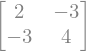

In [2]:
# Pay-off matrix
A = np.array([ [2, -3], [-3, 4] ])
Matrix(A) # from sympy

## Верхняя и нижняя цена игры

\begin{align*}
    \overline{\nu}&=\min_{j}\max_i a_{ij} & \underline{\nu}&=\max_i\min_j a_{ij}
\end{align*}

In [3]:
# Нижняя цена игры
max( A.min(axis=1) )

-3

In [4]:
# Верхняя цена игры
min( A.max(axis=0) )

2

Они не равны $\Longrightarrow$ нет равновесия Нэша в чистых стратегиях

## Ожидаемый выигрыш
Предположим, что игроки следуют смешанным стратегиям $P^\top=\begin{pmatrix} 0.3 & 0.7\end{pmatrix}$ и $Q^\top=\begin{pmatrix} 0.25 & 0.75\end{pmatrix}$. Ожидаемый выигрыш каждого из игроков.

Ожидаемый выигрышь первого $EU_A(P,Q)=P^\top AQ$, второго $EU_B(P,Q)=-EU_A(P,Q)$

In [5]:
P = np.array([0.3, 0.7])
Q = np.array([0.25, 0.75])
# Ожидаемый выигрыш
P.T@A@Q

## Равновесие Нэша в смешанных стратегиях
Библиотека `scipy.optimize.linprog` [решает](https://docs.scipy.org/doc/scipy/tutorial/optimize.html#linear-programming-linprog) задачу линейного программирования в виде
\begin{gather*}
    \min c^\top x \\ s.t.\left\{\begin{aligned} 
    A_{ub}x &\leq b_{ub} \\ A_{eq}x &= b_{eq} \\ l\leq x&\leq u
    \end{aligned}\right.
\end{gather*}
Матрица $A$ имеемт отрицательные элементы $\Longrightarrow$ будем использовать матрицу $A_c=A+4$

### Первый игрок
Первый игрок решает задачу оптимизации
\begin{gather*}
    \begin{gathered} \max 1^\top x\\ s.t. \left\{\begin{aligned}
    A_c^\top x &\leq 1 \\ x&\geq0
    \end{aligned}\right.
    \end{gathered} \Longrightarrow 
    \begin{gathered} \min c^\top x\\ s.t. \left\{\begin{aligned}
    A_c^\top x &\leq b \\ 0&\leq x
    \end{aligned}\right.
    \end{gathered}
\end{gather*}
где $c^\top=\begin{pmatrix} -1 & -1 \end{pmatrix}$, $b^\top=\begin{pmatrix} 1 & 1 \end{pmatrix}$

In [6]:
A_c = A+4
c = np.array([-1,-1])
b = np.array([1,1])
x_bounds = [(0, None), (0, None)]
result = linprog(c, A_ub=A_c.T, b_ub=b, bounds=x_bounds)
# Решение и значение целевая функции
result.x, result.fun

(array([0.14893617, 0.10638298]), -0.25531914893617025)

Цена игры с матрицей $A_c$ (выигрыш первого) и равновесная стратегия первого

In [7]:
U_c = -1/result.fun
P = U_c*result.x
U_c, P

(3.916666666666666, array([0.58333333, 0.41666667]))

Цена исходной игры

In [8]:
U_c-4

### Второй игрок
Первый игрок решает задачу оптимизации
\begin{gather*}
    \begin{gathered} \min 1^\top y\\ s.t. \left\{\begin{aligned}
    A_c u &\geq 1 \\ y&\geq0
    \end{aligned}\right.
    \end{gathered} \Longrightarrow 
    \begin{gathered} \min c^\top y\\ s.t. \left\{\begin{aligned}
    -A_c y &\leq b \\ 0&\leq y
    \end{aligned}\right.
    \end{gathered}
\end{gather*}
где $c^\top=\begin{pmatrix} 1 & 1 \end{pmatrix}$, $b^\top=\begin{pmatrix} -1 & -1 \end{pmatrix}$

In [9]:
A_c = A+4
c = np.array([1,1])
b = np.array([-1,-1])
y_bounds = [(0, None), (0, None)]
result = linprog(c, A_ub=-A_c, b_ub=b, bounds=y_bounds)
# Решение и значение целевой функции
result.x, result.fun

(array([0.14893617, 0.10638298]), 0.2553191489361702)

Равновесная стратегия второго и его выbигрыш в игре с матрицей $A_c$

In [10]:
U_c = 1/result.fun
Q = U_c*result.x
-U_c, Q

(-3.916666666666667, array([0.58333333, 0.41666667]))

Выигрыш второго игрока

In [11]:
-(U_c-4)